# Imports


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_val_predict


from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Import the Classifier and required libraries
import xgboost as xgb
from sklearn.metrics import recall_score, precision_score, f1_score

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error, roc_auc_score

from sklearn.preprocessing import LabelBinarizer

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler


In [5]:
from sklearn import preprocessing
from collections import Counter
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE   #to balance our data using smote

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset

In [ ]:
health = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
health.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
health.shape

(5110, 12)

In [ ]:
health = pd.DataFrame(health)

In [ ]:
print(health.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [ ]:
hypertension_map = {
    0: 'No hypertension',
    1: 'Hypertension'
}

# Apply the map to the 'hypertension' column
health['hypertension'] = health['hypertension'].map(hypertension_map)

In [ ]:
heartdisease_map = {
    0: 'No heart disease',
    1: 'heart disease'
}

# Apply the map to the 'hypertension' column
health['heart_disease'] = health['heart_disease'].map(heartdisease_map)

In [ ]:
stroke_map = {
    0: 'No stroke',
    1: 'stroke'
}

# Apply the map to the 'hypertension' column
health['stroke'] = health['stroke'].map(stroke_map)

In [ ]:
health.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No hypertension,heart disease,Yes,Private,Urban,228.69,36.6,formerly smoked,stroke
1,51676,Female,61.0,No hypertension,No heart disease,Yes,Self-employed,Rural,202.21,NaN,never smoked,stroke
2,31112,Male,80.0,No hypertension,heart disease,Yes,Private,Rural,105.92,32.5,never smoked,stroke
3,60182,Female,49.0,No hypertension,No heart disease,Yes,Private,Urban,171.23,34.4,smokes,stroke
4,1665,Female,79.0,Hypertension,No heart disease,Yes,Self-employed,Rural,174.12,24.0,never smoked,stroke


In [ ]:
health.dtypes

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

In [ ]:
#export modified data to csv
health.to_csv('health_defined.csv')

# Descriptive Analysis

a. Basic Statistics for all attributes

In [ ]:
health = pd.read_csv("health_defined.csv")

In [ ]:
health.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,No hypertension,heart disease,Yes,Private,Urban,228.69,36.6,formerly smoked,stroke
1,1,51676,Female,61.0,No hypertension,No heart disease,Yes,Self-employed,Rural,202.21,NaN,never smoked,stroke
2,2,31112,Male,80.0,No hypertension,heart disease,Yes,Private,Rural,105.92,32.5,never smoked,stroke
3,3,60182,Female,49.0,No hypertension,No heart disease,Yes,Private,Urban,171.23,34.4,smokes,stroke
4,4,1665,Female,79.0,Hypertension,No heart disease,Yes,Self-employed,Rural,174.12,24.0,never smoked,stroke


In [ ]:
#Drop the extra column
health = health.drop('Unnamed: 0', axis=1)

In [ ]:
health.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No hypertension,heart disease,Yes,Private,Urban,228.69,36.6,formerly smoked,stroke
1,51676,Female,61.0,No hypertension,No heart disease,Yes,Self-employed,Rural,202.21,NaN,never smoked,stroke
2,31112,Male,80.0,No hypertension,heart disease,Yes,Private,Rural,105.92,32.5,never smoked,stroke
3,60182,Female,49.0,No hypertension,No heart disease,Yes,Private,Urban,171.23,34.4,smokes,stroke
4,1665,Female,79.0,Hypertension,No heart disease,Yes,Self-employed,Rural,174.12,24.0,never smoked,stroke


In [ ]:
# Basic statistics for numerical columns
health.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


In [ ]:
# Basic statistics for categorical columns
health.describe(include=['object'])

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,No hypertension,No heart disease,Yes,Private,Urban,never smoked,No stroke
freq,2994,4612,4834,3353,2925,2596,1892,4861


# Data Visualisation

i. Histograms showing distribution in the numerical attributes

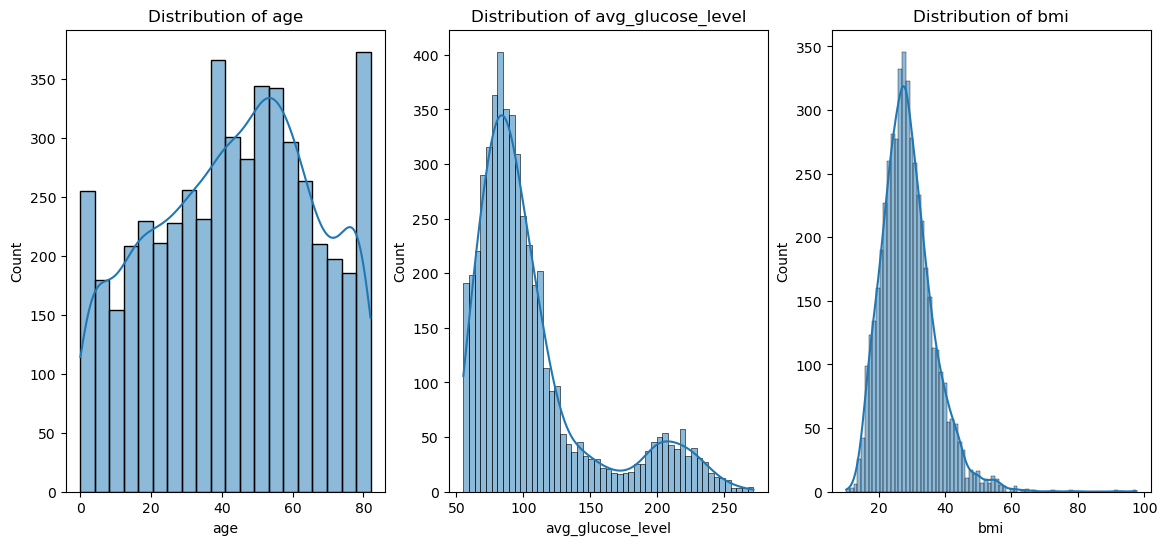

In [ ]:
# Histograms for continuous variables
plt.figure(figsize=(14, 6))
for i, column in enumerate(['age', 'avg_glucose_level', 'bmi']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(health[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.show()

ii. Box Plot showing average glucose level

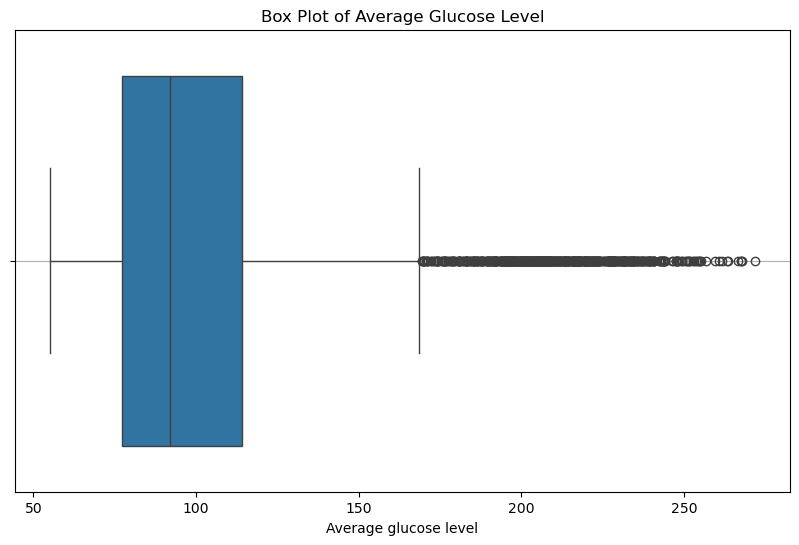

In [ ]:
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x=health['avg_glucose_level'])

# Set the title and labels
plt.title('Box Plot of Average Glucose Level')
plt.xlabel('Average glucose level')

# Show the plot
plt.grid(axis='y')
plt.show()

iii. Box Plot showing distribution on BMI

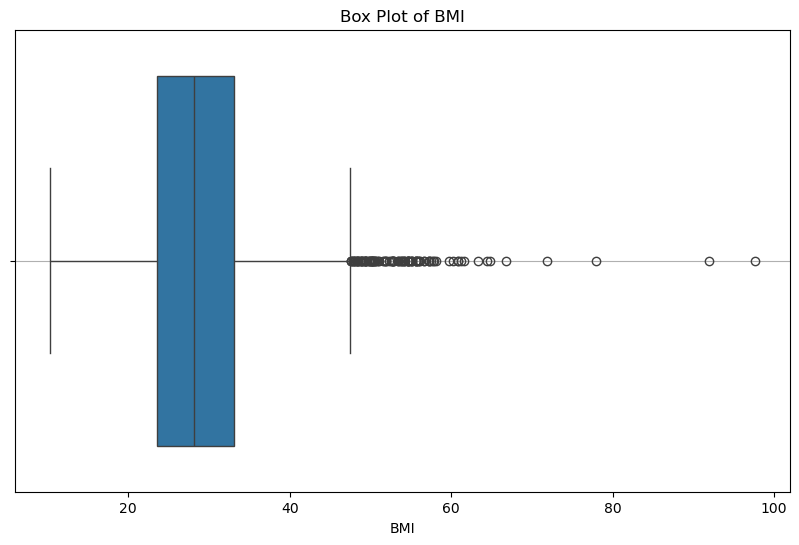

In [ ]:
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x=health['bmi'])

# Set the title and labels
plt.title('Box Plot of BMI')
plt.xlabel('BMI')

# Show the plot
plt.grid(axis='y')
plt.show()


iv. Scatter Plot Showing Relationship between age and BMI

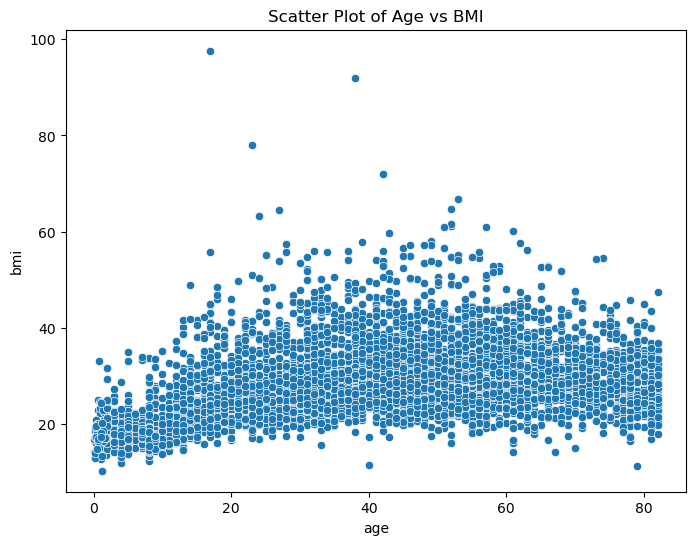

In [ ]:
# Scatter plot between age and BMI level
plt.figure(figsize=(8, 6))
sns.scatterplot(data=health, x='age', y='bmi')
plt.title('Scatter Plot of Age vs BMI')
plt.show()

v. Stacked column chart showing the relationship between smoking status and strokes

<Axes: xlabel='smoking_status'>

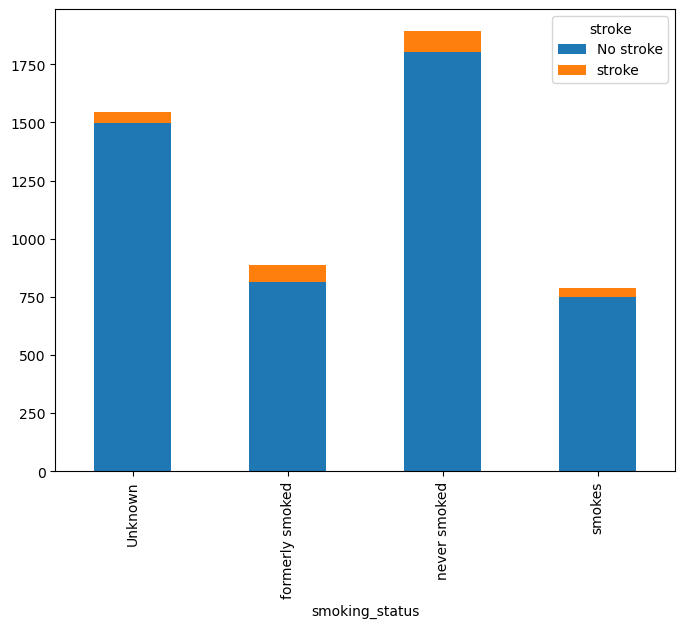

In [ ]:
health.groupby('smoking_status')['stroke'].value_counts().unstack().plot(kind = 'bar',
                                                                stacked = True,
                                                                figsize = (8, 6))

vi. Heatmap showing relationship of gender and hypertension

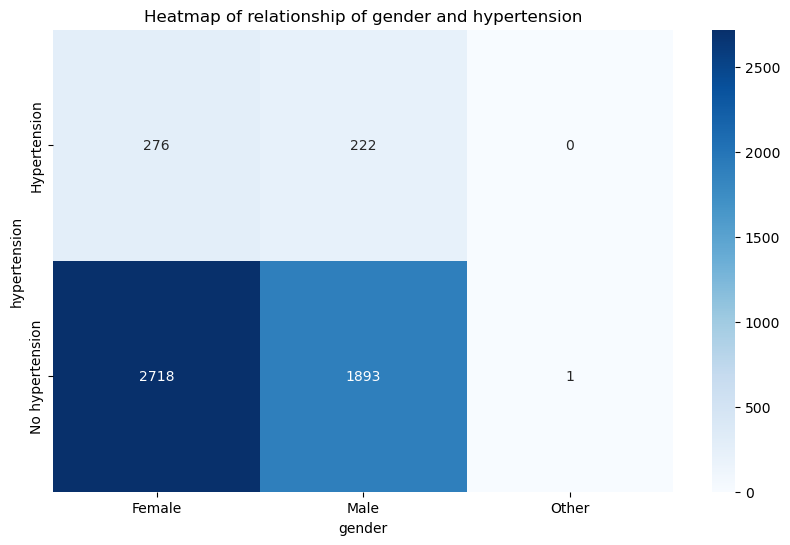

In [ ]:
# Create a contingency table (cross-tabulation) of Sex and Industry
heatmap_data = pd.crosstab(health['hypertension'], health['gender'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Heatmap of relationship of gender and hypertension')
plt.show()

# Data Cleaning and Preparation

In [ ]:
health = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
health.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


i. Drop noisy attributes

In [ ]:
#Drop the id column
health = health.drop('id', axis=1)

In [ ]:
health.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


ii. Check for missing values

In [ ]:
#Step 1: Checking if any of the columns have null values
health.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#Step 2: Calculate the median of the BMI value for imputation
median_value = health['bmi'].median()

# Print the median value
print(f"The median of the 'bmi' column is: {median_value}")

The median of the 'bmi' column is: 28.1


In [ ]:
#Step 3: Replace all null values in the bmi column with the median
health['bmi'] = health['bmi'].fillna(28.1)

In [ ]:
#Step 4: Check if the change has taken effect
health.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

iii. Checking for outliers

In [ ]:
# Check for outliers using IQR method for age column
Q1 = health['age'].quantile(0.25)
Q3 = health['age'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (health['age'] < (Q1 - 1.5 * IQR)) | (health['age'] > (Q3 + 1.5 * IQR))
outliers = health[outlier_condition]

outliers

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
# Check for outliers using IQR method for avg_glucose column
Q1 = health['avg_glucose_level'].quantile(0.25)
Q3 = health['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (health['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (health['avg_glucose_level'] > (Q3 + 1.5 * IQR))
outliers = health[outlier_condition]

outliers

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5063,Male,39.0,0,0,Yes,Private,Urban,179.38,27.7,Unknown,0
5064,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown,0


In [ ]:
# Check for outliers using IQR method for bmi column
Q1 = health['bmi'].quantile(0.25)
Q3 = health['bmi'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (health['bmi'] < (Q1 - 1.5 * IQR)) | (health['bmi'] > (Q3 + 1.5 * IQR))
outliers = health[outlier_condition]

outliers

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
66,Female,70.0,0,0,Yes,Private,Urban,221.58,47.5,never smoked,1
113,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
4906,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
4952,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
5009,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0
5057,Female,49.0,0,0,Yes,Govt_job,Urban,69.92,47.6,never smoked,0


In [ ]:
# Check for outliers using IQR method for heart_disease column
Q1 = health['heart_disease'].quantile(0.25)
Q3 = health['heart_disease'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (health['heart_disease'] < (Q1 - 1.5 * IQR)) | (health['heart_disease'] > (Q3 + 1.5 * IQR))
outliers = health[outlier_condition]

outliers

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,28.1,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
4855,Female,57.0,1,1,Yes,Private,Rural,231.72,45.7,formerly smoked,0
4869,Female,50.0,0,1,Yes,Private,Urban,193.80,26.4,never smoked,0
4921,Male,72.0,0,1,Yes,Private,Rural,238.27,28.1,smokes,0
4986,Male,58.0,0,1,Yes,Private,Rural,225.35,26.5,smokes,0


In [ ]:
# Check for outliers using IQR method for hypertension column
Q1 = health['hypertension'].quantile(0.25)
Q3 = health['hypertension'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (health['hypertension'] < (Q1 - 1.5 * IQR)) | (health['hypertension'] > (Q3 + 1.5 * IQR))
outliers = health[outlier_condition]

outliers

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
15,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
17,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
5088,Female,64.0,1,0,Yes,Self-employed,Urban,76.89,30.2,Unknown,0
5091,Male,59.0,1,0,Yes,Private,Rural,95.05,30.9,never smoked,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,28.1,smokes,0
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [ ]:
# Check for outliers using IQR method for bmi column
Q1 = health['stroke'].quantile(0.25)
Q3 = health['stroke'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (health['stroke'] < (Q1 - 1.5 * IQR)) | (health['stroke'] > (Q3 + 1.5 * IQR))
outliers = health[outlier_condition]

outliers

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,28.1,Unknown,1


In [ ]:
# Checking for any outliers in the categorical attributes
# Frequency count for categorical features
gender_counts = health['gender'].value_counts()
married_counts = health['ever_married'].value_counts()
work_type_counts = health['work_type'].value_counts()
residence_counts = health['Residence_type'].value_counts()
smoking_counts = health['smoking_status'].value_counts()


print("Gender Counts:\n", gender_counts)
print("\nMarital Counts:\n", married_counts)
print("\nWork Type Counts:\n", work_type_counts)
print("\nResidence Type Counts:\n", residence_counts)
print("\nSmoking Counts:\n", smoking_counts)

Gender Counts:
 gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Marital Counts:
 ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Work Type Counts:
 work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence Type Counts:
 Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Smoking Counts:
 smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


iv. Check correlation between attributes

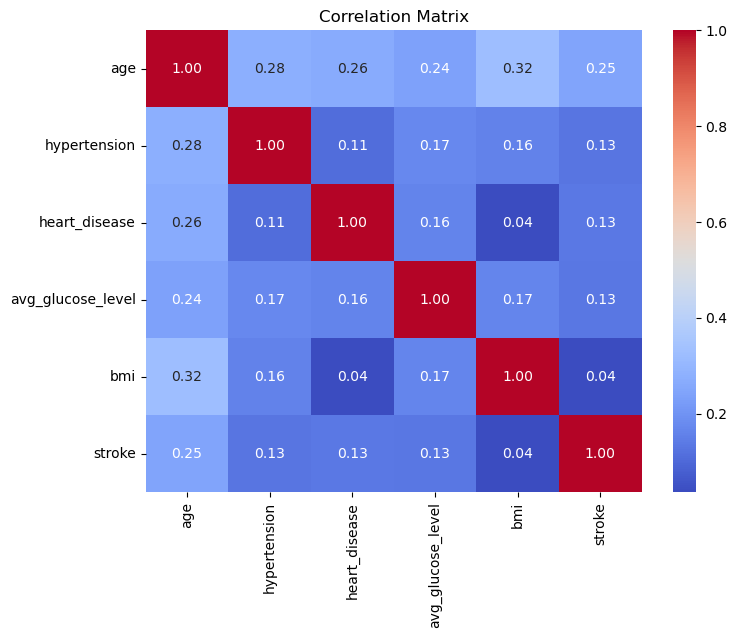

In [ ]:
num = health[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]
correlation_matrix = num.corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

v. Label Encoding

In [ ]:
#Step 1: Check data types
health = pd.DataFrame(health)
print(health.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [ ]:
# Step 2: Transforming categorical data into numerical data
LE = LabelEncoder()
health['gender'] = LE.fit_transform(health['gender'])
health['ever_married'] = LE.fit_transform(health['ever_married'])
health['work_type'] = LE.fit_transform(health['work_type'])
health['Residence_type'] = LE.fit_transform(health['Residence_type'])
health['smoking_status'] = LE.fit_transform(health['smoking_status'])
health['hypertension'] = LE.fit_transform(health['hypertension'])
health['heart_disease'] = LE.fit_transform(health['heart_disease'])
health['stroke'] = LE.fit_transform(health['stroke'])

In [ ]:
#Step 3: Check the changes
health.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [ ]:
health = pd.DataFrame(health)
print(health.dtypes)

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object


In [ ]:
health = health.to_csv('health_cleaned.csv')

vi. Checking for imbalance in the classes

In [ ]:
stroke_count = health['stroke'].value_counts()
print(stroke_count)

stroke
0    4861
1     249
Name: count, dtype: int64


vii. Balancing the classes and splitting the train and test sets



In [ ]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
X = health.iloc[:, :-1].values    # predictor attributes
y = health.iloc[:,-1].values     # target attribute

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train) # using smote

In [ ]:
count = Counter(y_train_sm)
count

Counter({0: 3663, 1: 3663})

viii. Standardization

In [ ]:
transform = preprocessing.StandardScaler()
X_train_sm = transform.fit_transform(X_train_sm)
X_test = transform.transform(X_test)

# CLASSIFICATION ON THE 'Stroke' ATTRIBUTE

# KNN

In [ ]:
# Check k=1 through k=10 and record the accuracy for each value
k_range = range(1, 11)

# create a Python dictionary where the scores will be recorded
scores = []

# loop through the k values; append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sm, y_train_sm)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.9076682316118936, 0.9100156494522692, 0.8732394366197183, 0.878716744913928, 0.8575899843505478, 0.865414710485133, 0.8333333333333334, 0.8442879499217527, 0.823943661971831, 0.8262910798122066]


Text(0, 0.5, 'Accuracy')

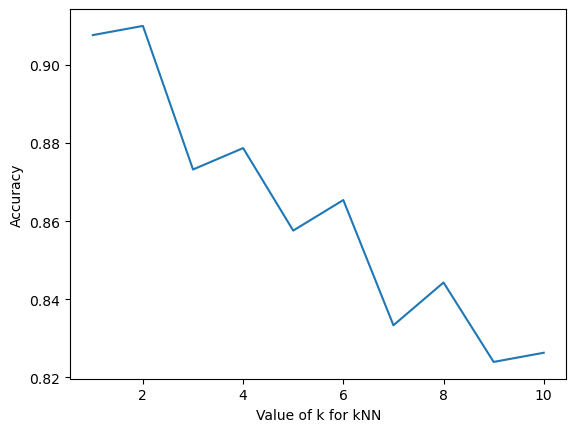

In [ ]:
# plot the relationship between k values and accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of k for kNN')
plt.ylabel('Accuracy')

In [ ]:
# Implement kNN cross-validation using k=2 since it has the highest accuracy
knn = KNeighborsClassifier(n_neighbors=2)

#accuracy scores for each fold
#Stratified sampling ensures all classes are represented similarly in each fold, helping balance the evaluation across all classes.
#Setting splits=10 means that the data will be split into 10 subsets (folds). The model will be trained on 9 of these folds and tested on the remaining fold, and this process will be repeated 10 times, with each fold being used as the test set once.
X = X_train_sm
y = y_train_sm
skf = StratifiedKFold(n_splits=10)
scores = cross_val_score(knn, X, y, cv=skf)
print(scores)

#print the average accuracy across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.96043656 0.97407913 0.97135061 0.98090041 0.96452933 0.97407913
 0.9726776  0.96721311 0.96584699 0.9726776 ]
Accuracy: 0.97 (+/- 0.01)


In [ ]:
#performance metrics

#predicted values
y_pred = cross_val_predict(knn, X, y, cv=10)

print(confusion_matrix(y, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)), '\n')

print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))
print("AUC:", roc_auc_score(y, y_pred))

[[3484  179]
 [  38 3625]] 

Mean Absolute Error: 0.02962052962052962
Mean Squared Error: 0.02962052962052962
Root Mean Squared Error: 0.17210615799711995 

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3663
           1       0.95      0.99      0.97      3663

    accuracy                           0.97      7326
   macro avg       0.97      0.97      0.97      7326
weighted avg       0.97      0.97      0.97      7326

Accuracy: 0.9703794703794704
AUC: 0.9703794703794704


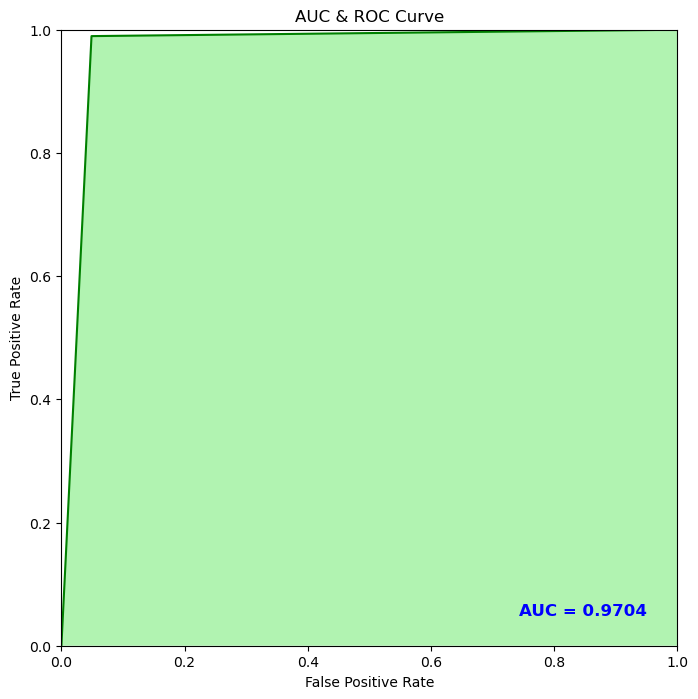

In [ ]:
# Calculate the ROC and AUC and then plot them by using the matplotlib library

auc = metrics.roc_auc_score(y, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Naive Bayes

In [ ]:
NB = GaussianNB()
X = X_train_sm
y = y_train_sm
#accuracy scores for each fold
scores = cross_val_score(NB, X, y, cv=10)
print(scores)

#print the average accuracy across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.74351978 0.78717599 0.7899045  0.77762619 0.78035471 0.77216917
 0.79371585 0.78825137 0.78688525 0.82513661]
Accuracy: 0.78 (+/- 0.04)


In [ ]:
# Initialize the Naive Bayes classifier
NB = GaussianNB()
# Fit the classifier to the data
NB.fit(X_train_sm, y_train_sm)
# Use cross-validation to get predicted values
y_pred = cross_val_predict(NB, X, y, cv=10)

print(confusion_matrix(y, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)), '\n')

print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))
print("AUC:", roc_auc_score(y, y_pred))

[[2672  991]
 [ 588 3075]] 

Mean Absolute Error: 0.21553371553371553
Mean Squared Error: 0.21553371553371553
Root Mean Squared Error: 0.4642560883108756 

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      3663
           1       0.76      0.84      0.80      3663

    accuracy                           0.78      7326
   macro avg       0.79      0.78      0.78      7326
weighted avg       0.79      0.78      0.78      7326

Accuracy: 0.7844662844662844
AUC: 0.7844662844662844


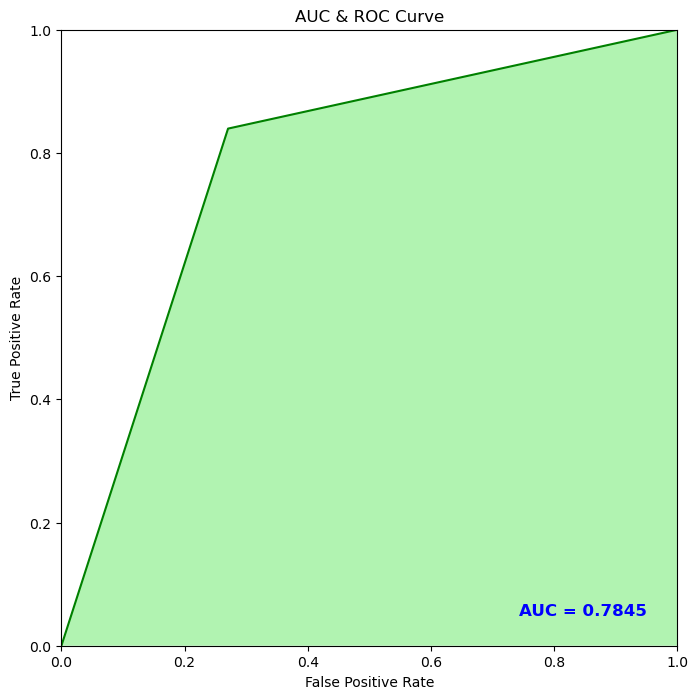

In [ ]:
# Calculate the ROC and AUC and then plot them by using the matplotlib library

auc = metrics.roc_auc_score(y, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Naive Bayes Variance Smoothing

In [ ]:
model = GaussianNB(var_smoothing=1e-8)
X = X_train_sm
y = y_train_sm
#accuracy scores for each fold
scores = cross_val_score(model, X, y, cv=10)
print(scores)

#print the average accuracy across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.74351978 0.78717599 0.7899045  0.77762619 0.78035471 0.77216917
 0.79371585 0.78825137 0.78688525 0.82513661]
Accuracy: 0.78 (+/- 0.04)


In [ ]:
# Initialize the Naive Bayes classifier
model = GaussianNB(var_smoothing=1e-8)
# Fit the classifier to the data
model.fit(X_train_sm, y_train_sm)
# Use cross-validation to get predicted values
y_pred = cross_val_predict(model, X, y, cv=10)

print(confusion_matrix(y, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)), '\n')

print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))
print("AUC:", roc_auc_score(y, y_pred))

[[2672  991]
 [ 588 3075]] 

Mean Absolute Error: 0.21553371553371553
Mean Squared Error: 0.21553371553371553
Root Mean Squared Error: 0.4642560883108756 

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      3663
           1       0.76      0.84      0.80      3663

    accuracy                           0.78      7326
   macro avg       0.79      0.78      0.78      7326
weighted avg       0.79      0.78      0.78      7326

Accuracy: 0.7844662844662844
AUC: 0.7844662844662844


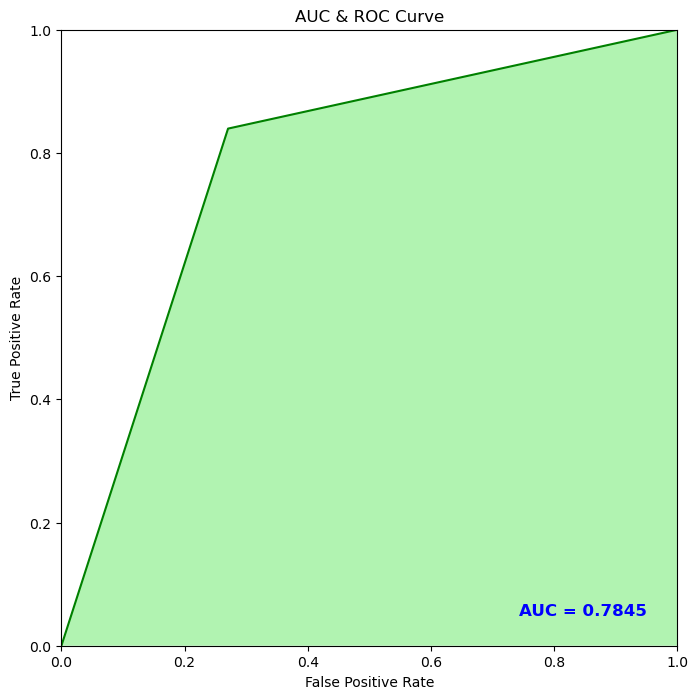

In [ ]:
# Calculate the ROC and AUC and then plot them by using the matplotlib library

auc = metrics.roc_auc_score(y, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Decision Tree

In [ ]:
DT = DecisionTreeClassifier(criterion ='entropy', random_state= 0)

In [ ]:
# Fit the model
DT.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Generate predictions for the test set using the DT model
y_pred = DT.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[1143,   55],
       [  66,   14]], dtype=int64)

<Axes: >

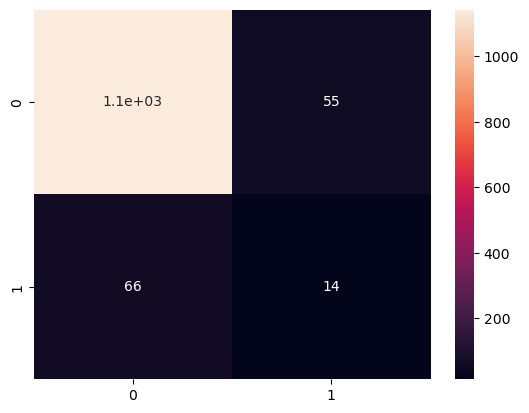

In [ ]:
# Visualise the confusion matrix using a heatmap
sns.heatmap(cm, annot=True)


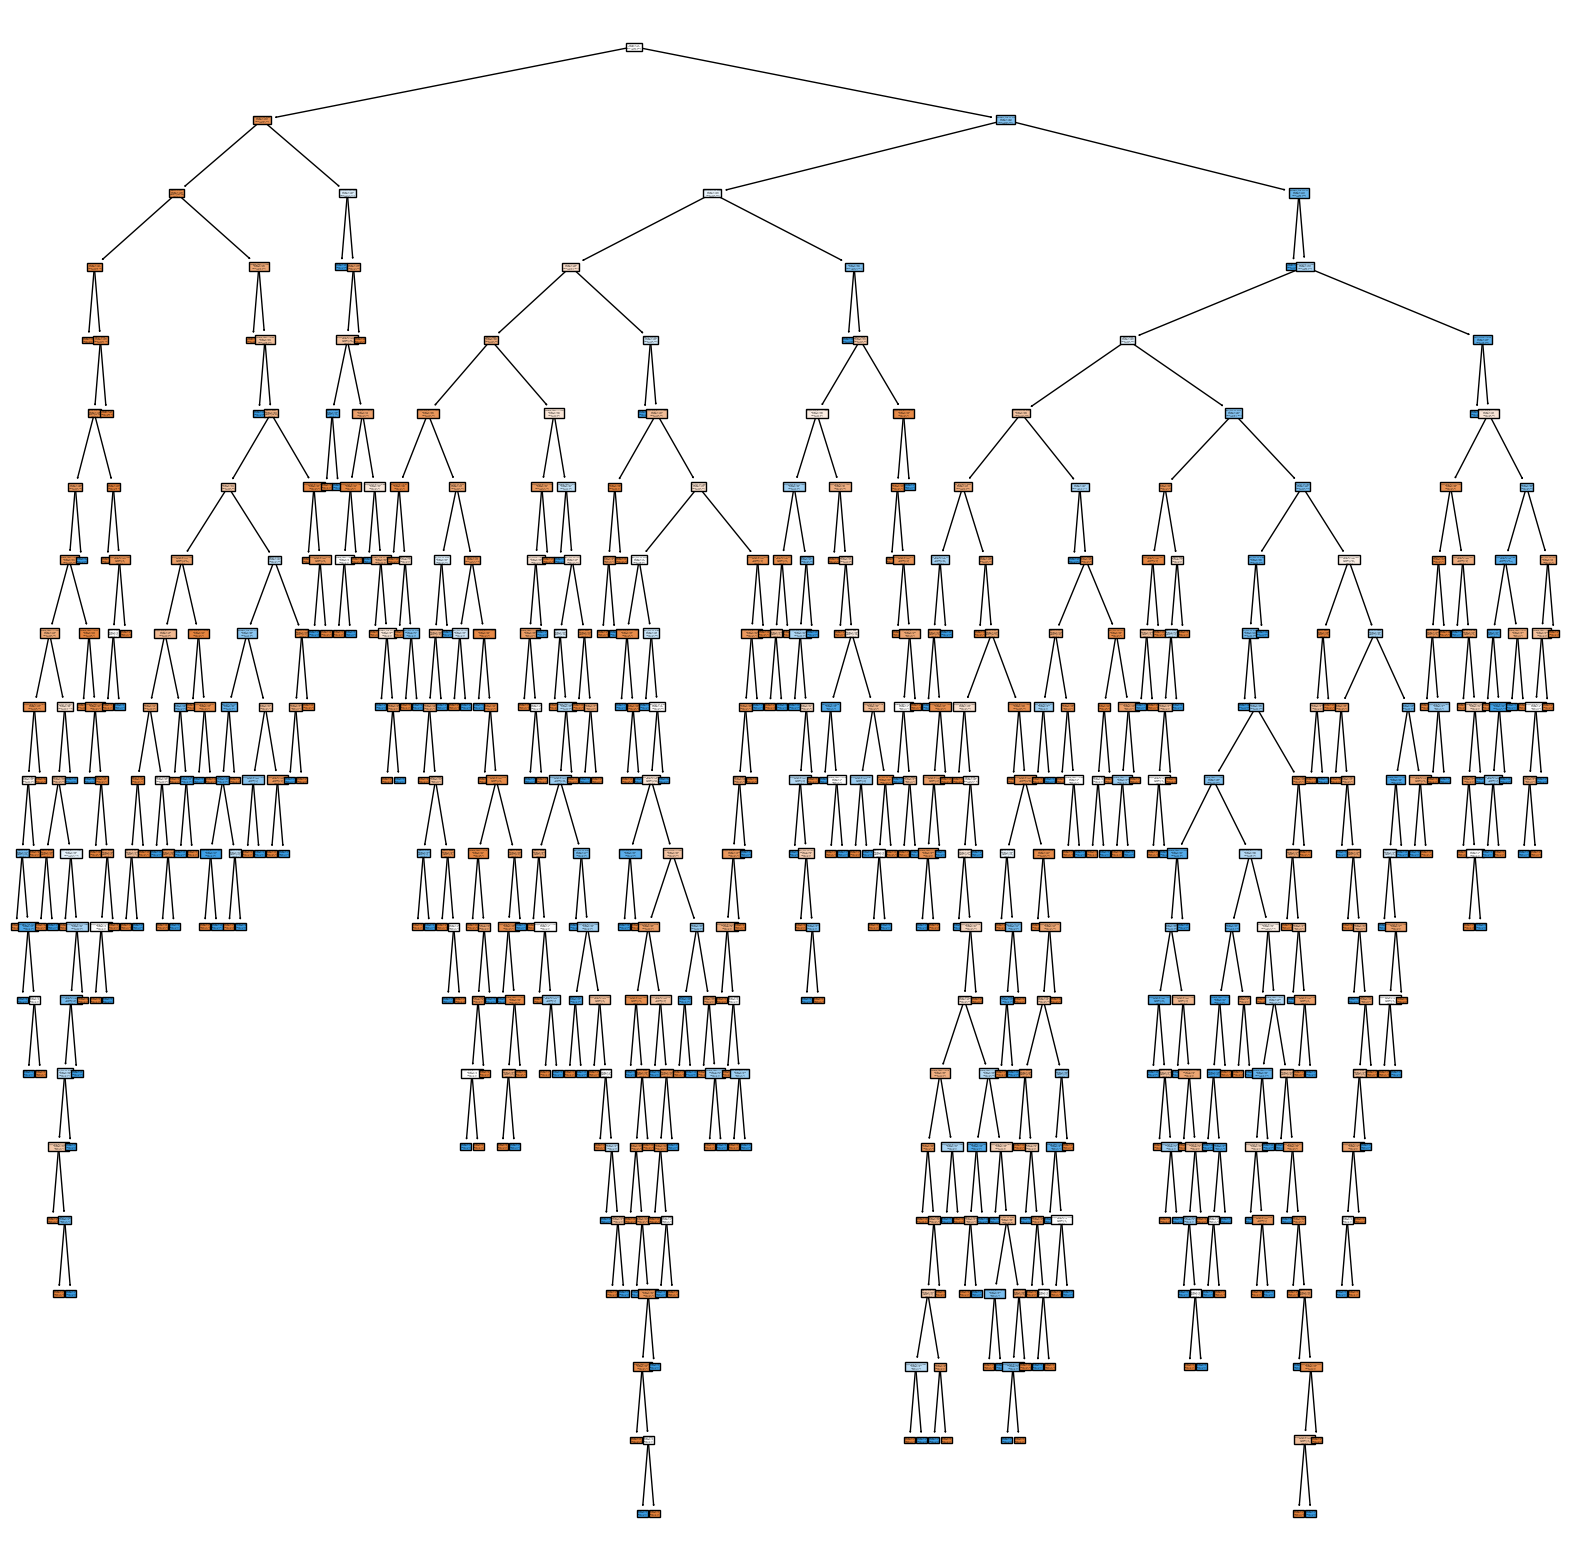

In [ ]:
#visualising the tree

plt.figure(figsize=(20,20))
features = health.columns
classes = ['0', '1',]
tree.plot_tree(DT,feature_names=features,class_names=classes,filled=True)
plt.show()

In [ ]:
#minimal cost-complexity pruning
DT1 = DecisionTreeClassifier(random_state=0)

path = DT1.cost_complexity_pruning_path(X_train_sm, y_train_sm)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

DTs = []
for ccp_alpha in ccp_alphas:
    DT = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    DT.fit(X_train_sm, y_train_sm)
    DTs.append(DT)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        DTs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1763930012301661


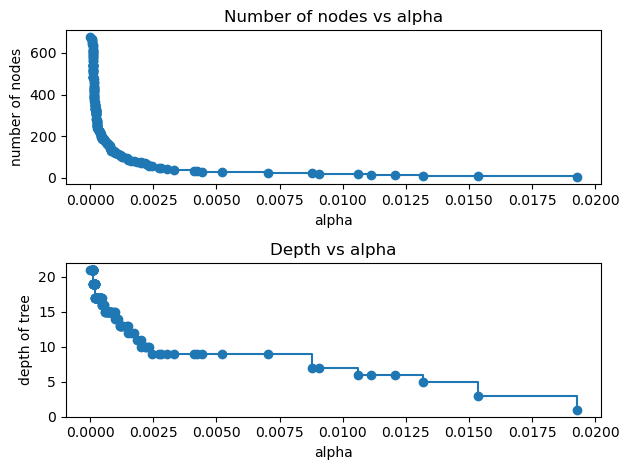

In [ ]:
#remove the last element in DTs and ccp_alphas, because it is the trivial tree with only one node
DTs = DTs[:-1]
ccp_alphas = ccp_alphas[:-1]

#plots to show that the number of nodes and tree depth decreases as alpha increases
node_counts = [DT.tree_.node_count for DT in DTs]
depth = [DT.tree_.max_depth for DT in DTs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

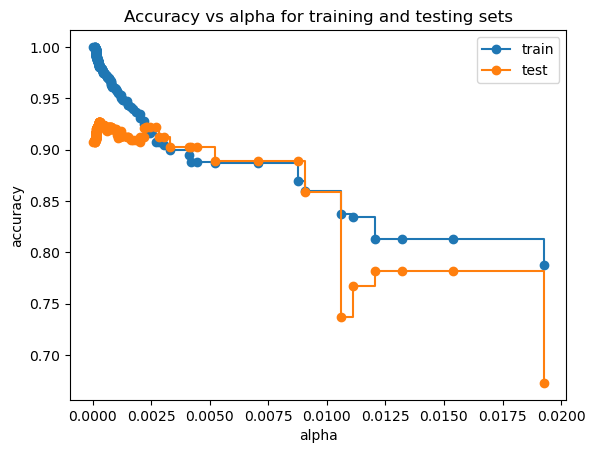

In [ ]:
train_scores = [DT.score(X_train_sm, y_train_sm) for DT in DTs]
test_scores = [DT.score(X_test, y_test) for DT in DTs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

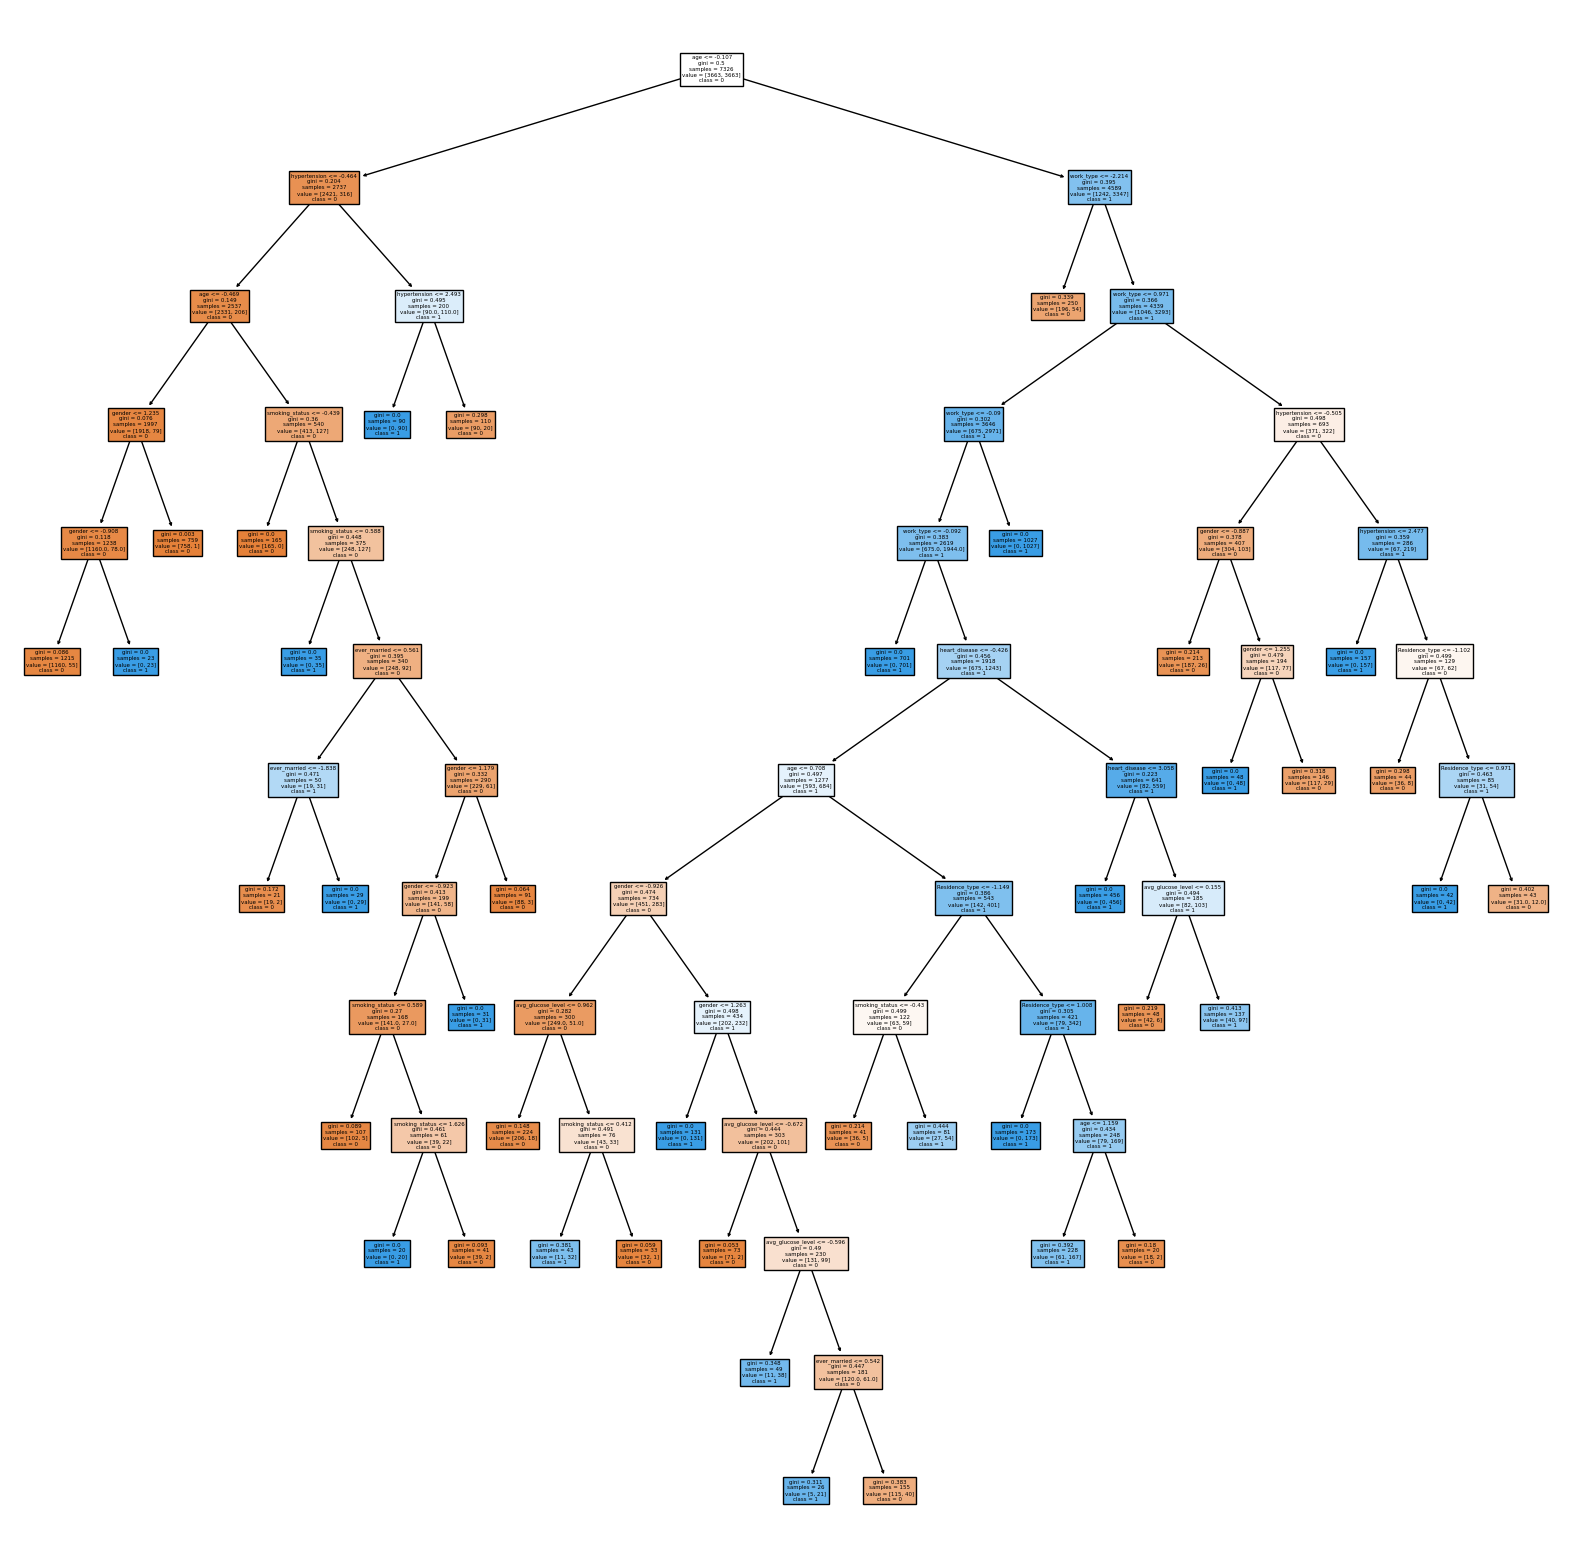

In [ ]:
#visualise the prunned tree; notice the smaller size of the tree

DT2 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.00176)
DT2.fit(X_train_sm, y_train_sm)

plt.figure(figsize=(20,20))
features = health.columns
classes = ['0','1']
tree.plot_tree(DT2,feature_names=features,class_names=classes,filled=True)
plt.show()

In [ ]:
#cross-validation
DT = DecisionTreeClassifier(criterion ='entropy', random_state= 0)
X=X_train_sm
y=y_train_sm
#accuracy scores for each fold
scores = cross_val_score(DT, X, y, cv=10)
print(scores)

#print the average accuracy across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.80763984 0.95634379 0.96452933 0.96998636 0.96316508 0.97135061
 0.96994536 0.96721311 0.96311475 0.9795082 ]
Accuracy: 0.95 (+/- 0.10)


In [ ]:
#predicted values
y_pred = cross_val_predict(DT, X, y, cv=10)

print(confusion_matrix(y, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)), '\n')

print(classification_report(y, y_pred))
print("Accuracy:", accuracy_score(y, y_pred))
print("AUC:", roc_auc_score(y, y_pred))

[[3471  192]
 [ 165 3498]] 

Mean Absolute Error: 0.04873054873054873
Mean Squared Error: 0.04873054873054873
Root Mean Squared Error: 0.2207499688121127 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3663
           1       0.95      0.95      0.95      3663

    accuracy                           0.95      7326
   macro avg       0.95      0.95      0.95      7326
weighted avg       0.95      0.95      0.95      7326

Accuracy: 0.9512694512694513
AUC: 0.9512694512694513


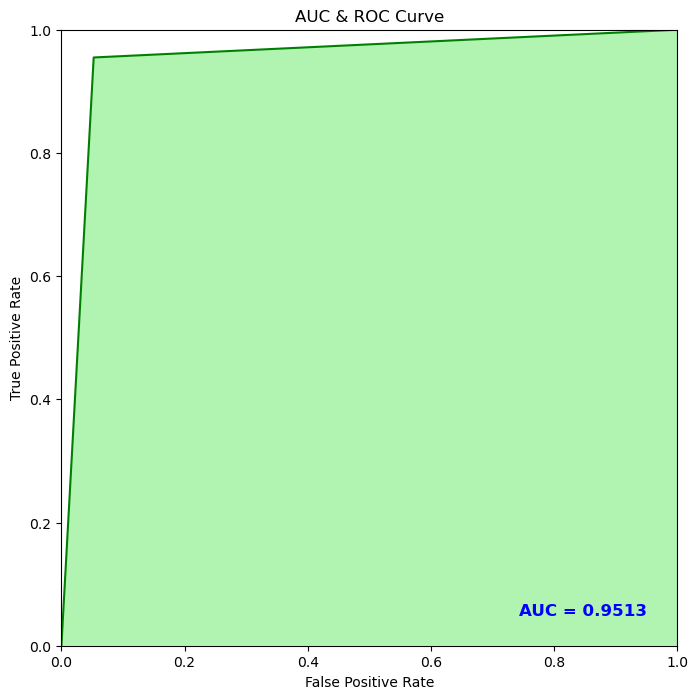

In [ ]:
# Calculate the ROC and AUC and then plot them by using the matplotlib library

auc = metrics.roc_auc_score(y, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# XGBoost

In [ ]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 325.1 kB/s eta 0:06:25
   ---------------------------------------- 0.2/124.9 MB 1.1 MB/s eta 0:01:49
   ---------------------------------------- 0.7/124.9 MB 4.0 MB/s eta 0:00:32
   ---------------------------------------- 1.5/124.9 MB 6.8 MB/s eta 0:00:19
    --------------------------------------- 2.7/124.9 MB 10.2 MB/s eta 0:00:12
   - -------------------------------------- 4.6/124.9 MB 14.6 MB/s eta 0:00:09
   -- ------------------------------------- 7.3/124.9 MB 20.3 MB/s eta 0:00:06
   --- ------------------------------------ 11.3/124.9 MB 46.7 MB/s eta 0:00:03
   ---- ----------------------------------- 15.5/124.9 MB 81.8 MB/s eta 0:00:02
   ------ --------------------------------- 19.3/124.9 MB 81.8 MB/s eta 0:00

In [ ]:
# Initialize the model
model = XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
model.fit(X_train_sm, y_train_sm)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
X=X_train_sm
y=y_train_sm
# Run cross-validation with additional metrics
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)

# Print the results
print(f"Accuracy scores: {cv_results['test_accuracy']}")
print(f"Precision scores: {cv_results['test_precision']}")
print(f"Recall scores: {cv_results['test_recall']}")
print(f"F1 scores: {cv_results['test_f1']}")

# Calculate and print mean and std for each metric
for metric in scoring:
    print(f"Mean {metric}: {np.mean(cv_results[f'test_{metric}'])}")
    print(f"Standard deviation of {metric}: {np.std(cv_results[f'test_{metric}'])}")


Accuracy scores: [0.89085948 0.9883959  0.9890785  0.9883959  0.9890785 ]
Precision scores: [0.9965338  0.97730307 0.97989276 0.97860963 0.97991968]
Recall scores: [0.78444748 1.         0.99863388 0.99863574 0.99863574]
F1 scores: [0.8778626  0.98852127 0.98917456 0.98852127 0.98918919]
Mean accuracy: 0.9691616574086577
Standard deviation of accuracy: 0.039152277988014815
Mean precision: 0.9824517864064719
Standard deviation of precision: 0.007106822500243101
Mean recall: 0.9560705685892993
Standard deviation of recall: 0.08581317440144466
Mean f1: 0.9666537767301329
Standard deviation of f1: 0.04439657386431513


In [ ]:
# Get cross-validation predictions (predicted values for each fold)
y_pred_cv = cross_val_predict(model, X, y, cv=5, method='predict')

# Get predicted probabilities for AUC calculation (class 1 probabilities)
y_pred_proba_cv = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_cv), '\n')

# Print classification report
print("Classification Report:")
print(classification_report(y, y_pred_cv))

# Accuracy score
accuracy = accuracy_score(y, y_pred_cv)
print("Accuracy:", accuracy)

# AUC score
auc_score = roc_auc_score(y, y_pred_proba_cv)
print("AUC Score:", auc_score)

Confusion Matrix:
[[3598   65]
 [ 161 3502]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3663
           1       0.98      0.96      0.97      3663

    accuracy                           0.97      7326
   macro avg       0.97      0.97      0.97      7326
weighted avg       0.97      0.97      0.97      7326

Accuracy: 0.9691509691509691
AUC Score: 0.9889033549967211


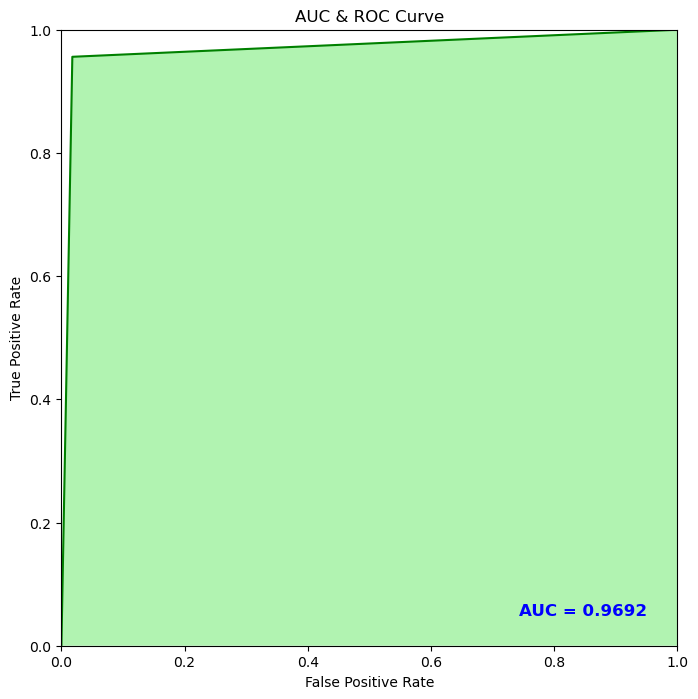

In [ ]:
# Calculate the ROC and AUC and then plot them by using the matplotlib library

auc = metrics.roc_auc_score(y, y_pred_cv)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y, y_pred_cv)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# REGRESSION ON THE 'BMI' ATTRIBUTE

# Linear Regression

In [ ]:
health.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [ ]:
health.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Drop the rows with null values in the bmi column
health = health.dropna(subset=['bmi'])

In [ ]:
health.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [ ]:
health.shape

(4909, 11)

In [ ]:
health.keys()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
health1 = health[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status', 'stroke', 'bmi']]

In [ ]:
health1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,1,67.0,0,1,1,2,1,228.69,1,1,36.6
2,1,80.0,0,1,1,2,0,105.92,2,1,32.5
3,0,49.0,0,0,1,2,1,171.23,3,1,34.4
4,0,79.0,1,0,1,3,0,174.12,2,1,24.0
5,1,81.0,0,0,1,2,1,186.21,1,1,29.0


In [ ]:
X = health1.iloc[:,:-1].values    # predictor attributes
y = health1.iloc[:,-1].values     # target attribute

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# initialize the Naive Bayes classifier
LR = LinearRegression()

#fit the classifier to the data
LR.fit(X_train_scaled, y_train)

#use the resulting model to predict value on the test sey
y_pred = LR.predict(X_test_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print("R2 score:", r2_score(y_test, y_pred))

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)

Mean Absolute Error: 5.487304726706933
Mean Squared Error: 56.727048155364834
Root Mean Squared Error: 7.531736065168829 

R2 score: 0.1548879031241991
Adjusted R2 score: 0.14794367882776693


# Random Forest Regression

In [ ]:
# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)

# R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

# Calculate Adjusted R-squared
n = len(y_test)  # Number of data points
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print("Adjusted R2:", adj_r2)

Mean Absolute Error: 5.407773615635179
Mean Squared Error: 52.7627262801303
Root Mean Squared Error: 7.26379558358647
R2 score: 0.21394784862840055
Adjusted R2: 0.2074889155850842


# CLUSTERING

In [ ]:
health.shape

(5110, 11)

In [ ]:
health.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [ ]:
#standardise the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(health.values)
scaled_features_health = pd.DataFrame(scaled_features, index=health.index, columns=health.columns)
scaled_features_health.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03
mean,-7.508671e-17,5.005781e-17,-4.727682e-17,5.561978e-18,-6.118176e-17,-2.113552e-16,-9.177264e-17,1.001156e-16,-4.449583e-17,5.561978e-18,2.224791e-17
std,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00
min,-8.403440e-01,-1.908261e+00,-3.286019e-01,-2.389468e-01,-1.381436e+00,-1.988384e+00,-1.016178e+00,-1.126958e+00,-2.411027e+00,-1.285114e+00,-2.263273e-01
25%,-8.403440e-01,-8.061152e-01,-3.286019e-01,-2.389468e-01,-1.381436e+00,-1.538364e-01,-1.016178e+00,-6.383223e-01,-6.575089e-01,-1.285114e+00,-2.263273e-01
50%,-8.403440e-01,7.843218e-02,-3.286019e-01,-2.389468e-01,7.238842e-01,-1.538364e-01,9.840797e-01,-3.149945e-01,-9.898092e-02,5.815523e-01,-2.263273e-01
75%,1.188073e+00,7.860701e-01,-3.286019e-01,-2.389468e-01,7.238842e-01,7.634376e-01,9.840797e-01,1.754080e-01,5.115031e-01,5.815523e-01,-2.263273e-01
max,3.216489e+00,1.714845e+00,3.043196e+00,4.185032e+00,7.238842e-01,1.680712e+00,9.840797e-01,3.657145e+00,8.928390e+00,1.514885e+00,4.418381e+00


In [ ]:
scaled_features_health.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.188073,1.051434,-0.328602,4.185032,0.723884,-0.153836,0.984080,2.706375,1.005086,-0.351781,4.418381
1,-0.840344,0.786070,-0.328602,-0.238947,0.723884,0.763438,-1.016178,2.121559,-0.098981,0.581552,4.418381
2,1.188073,1.626390,-0.328602,4.185032,0.723884,-0.153836,-1.016178,-0.005028,0.472536,0.581552,4.418381
3,-0.840344,0.255342,-0.328602,-0.238947,0.723884,-0.153836,0.984080,1.437358,0.719327,1.514885,4.418381
4,-0.840344,1.582163,3.043196,-0.238947,0.723884,0.763438,-1.016178,1.501184,-0.631531,0.581552,4.418381


# K-Means Clustering

In [ ]:
# Now you can create the KMeans object
kmeans = KMeans(n_clusters=2, random_state=0)

# Assuming 'scaled_features_health' is your dataset
kmeans.fit(scaled_features_health)


KMeans(n_clusters=2, random_state=0)

In [ ]:
scaled_features_health.shape

(5110, 11)

In [ ]:
kmeans.cluster_centers_

array([[-0.02886381,  0.49744068,  0.13865461,  0.10040656,  0.58950204,
        -0.27453031,  0.00915018,  0.11587275,  0.2748571 ,  0.20999589,
         0.09354905],
       [ 0.0670361 , -1.15530436, -0.32202488, -0.2331939 , -1.36911658,
         0.63759574, -0.02125126, -0.2691141 , -0.63835472, -0.48771478,
        -0.21726736]])

In [ ]:
# Compute the silhouette score
kmeans_silhouette = silhouette_score(scaled_features_health, kmeans.labels_).round(2)
kmeans_silhouette

0.18

In [ ]:
!pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/282.6 kB 326.8 kB/s eta 0:00:01
   ------------------------------------ --- 256.0/282.6 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.9 MB/s eta 0:00:00


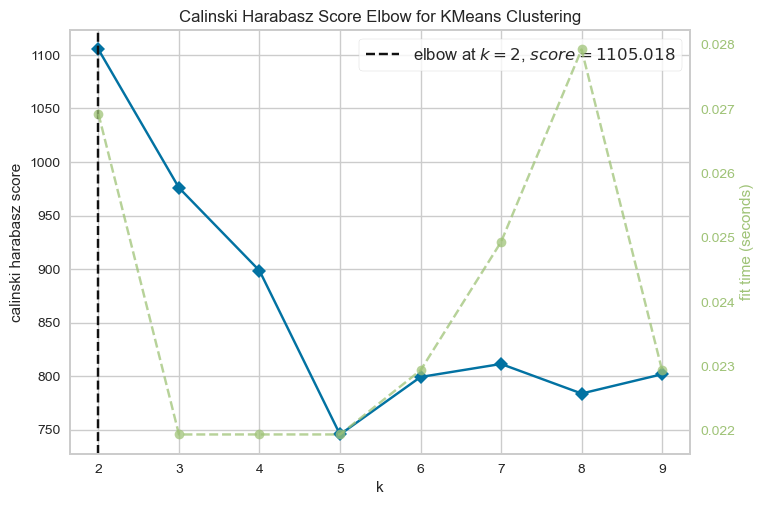

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')

visualizer.fit(scaled_features_health)        # Fit the data to the visualizer
visualizer.show()                            # Finalize and render the figure

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


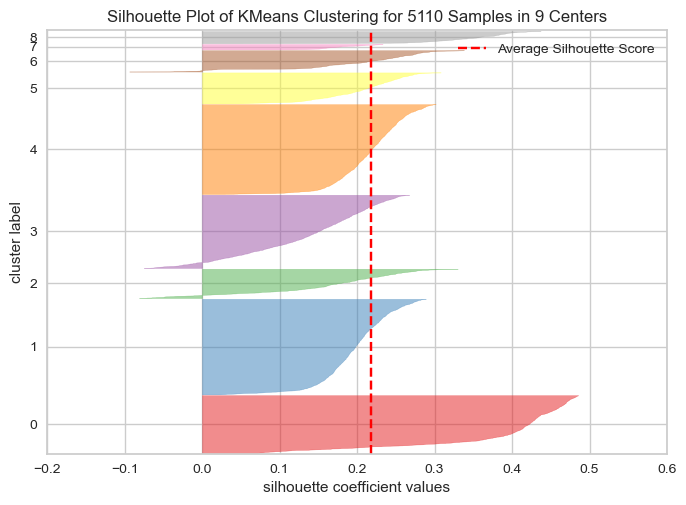

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5110 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_features_health)    # Fit the data to the visualizer
visualizer.poof()

In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#append dataframe with cluster number
scaled_features_health['cluster'] = kmeans.labels_

In [ ]:
kmeans.labels_ == 0

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
#view proterties of each cluster
cluster1=scaled_features_health.query("cluster == 0")
cluster2=scaled_features_health.query("cluster == 1")

In [ ]:
cluster1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster
0,1.188073,1.051434,-0.328602,4.185032,0.723884,-0.153836,0.984080,2.706375,1.005086,-0.351781,4.418381,0
1,-0.840344,0.786070,-0.328602,-0.238947,0.723884,0.763438,-1.016178,2.121559,-0.098981,0.581552,4.418381,0
2,1.188073,1.626390,-0.328602,4.185032,0.723884,-0.153836,-1.016178,-0.005028,0.472536,0.581552,4.418381,0
3,-0.840344,0.255342,-0.328602,-0.238947,0.723884,-0.153836,0.984080,1.437358,0.719327,1.514885,4.418381,0
4,-0.840344,1.582163,3.043196,-0.238947,0.723884,0.763438,-1.016178,1.501184,-0.631531,0.581552,4.418381,0


In [ ]:
cluster1.shape

(3572, 12)

In [ ]:
cluster1.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster
count,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.000000,3572.0
mean,-0.028864,0.497441,0.138655,0.100407,0.589502,-0.274530,0.009150,0.115873,0.274857,0.209996,0.093549,0.0
std,0.993879,0.693867,1.165138,1.177506,0.514717,0.857143,0.999951,1.105017,0.944362,0.926369,1.176350,0.0
min,-0.840344,-1.159934,-0.328602,-0.238947,-1.381436,-1.988384,-1.016178,-1.124749,-2.281137,-1.285114,-0.226327,0.0
25%,-0.840344,-0.054250,-0.328602,-0.238947,0.723884,-0.153836,-1.016178,-0.620820,-0.319794,-0.351781,-0.226327,0.0
50%,-0.840344,0.476478,-0.328602,-0.238947,0.723884,-0.153836,0.984080,-0.276125,0.082865,0.581552,-0.226327,0.0
75%,1.188073,1.051434,-0.328602,-0.238947,0.723884,-0.153836,0.984080,0.316643,0.719327,0.581552,-0.226327,0.0
max,1.188073,1.714845,3.043196,4.185032,0.723884,0.763438,0.984080,3.657145,8.928390,1.514885,4.418381,0.0


In [ ]:
cluster2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster
118,-0.840344,-0.231159,-0.328602,-0.238947,-1.381436,0.763438,0.984080,-0.527123,-0.631531,-0.351781,4.418381,1
162,-0.840344,-1.853419,-0.328602,-0.238947,-1.381436,1.680712,0.984080,-0.790158,-0.098981,-1.285114,4.418381,1
245,-0.840344,-1.292616,-0.328602,-0.238947,-1.381436,1.680712,-1.016178,-1.064899,0.264712,-1.285114,4.418381,1
249,1.188073,-1.779117,-0.328602,-0.238947,-1.381436,1.680712,-1.016178,-0.243549,-1.410872,-1.285114,-0.226327,1
251,-0.840344,-1.557980,-0.328602,-0.238947,-1.381436,-0.153836,0.984080,0.104735,-1.462828,-1.285114,-0.226327,1


In [ ]:
cluster2.shape

(1538, 12)

In [ ]:
cluster2.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.0
mean,0.067036,-1.155304,-0.322025,-0.233194,-1.369117,0.637596,-0.021251,-0.269114,-0.638355,-0.487715,-0.217267,1.0
std,1.011544,0.543517,0.148820,0.159481,0.160631,1.017721,1.000441,0.619695,0.818113,0.995160,0.205002,0.0
min,-0.840344,-1.908261,-0.328602,-0.238947,-1.381436,-1.988384,-1.016178,-1.126958,-2.411027,-1.285114,-0.226327,1.0
25%,-0.840344,-1.557980,-0.328602,-0.238947,-1.381436,-0.153836,-1.016178,-0.683045,-1.267993,-1.285114,-0.226327,1.0
50%,-0.840344,-1.204162,-0.328602,-0.238947,-1.381436,-0.153836,-1.016178,-0.392293,-0.774410,-1.285114,-0.226327,1.0
75%,1.188073,-0.850343,-0.328602,-0.238947,-1.381436,1.680712,0.984080,0.017223,-0.124959,0.581552,-0.226327,1.0
max,3.216489,1.670617,3.043196,4.185032,0.723884,1.680712,0.984080,3.325866,2.589747,1.514885,4.418381,1.0


In [ ]:
cluster1_mean = kmeans.cluster_centers_[0]
cluster2_mean = kmeans.cluster_centers_[1]

In [ ]:
cluster1.keys()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'cluster'],
      dtype='object')

In [ ]:
cluster2.keys()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'cluster'],
      dtype='object')

In [ ]:
len(cluster1.keys())

12

In [ ]:
len(cluster2.keys())

12

In [ ]:
cluster1_mean

array([-0.02886381,  0.49744068,  0.13865461,  0.10040656,  0.58950204,
       -0.27453031,  0.00915018,  0.11587275,  0.2748571 ,  0.20999589,
        0.09354905])

In [ ]:
cluster2_mean

array([ 0.0670361 , -1.15530436, -0.32202488, -0.2331939 , -1.36911658,
        0.63759574, -0.02125126, -0.2691141 , -0.63835472, -0.48771478,
       -0.21726736])

In [ ]:
cluster1_mean_p1 = cluster1_mean[:6]

In [ ]:
cluster1_mean_p1

array([-0.02886381,  0.49744068,  0.13865461,  0.10040656,  0.58950204,
       -0.27453031])

In [ ]:
cluster2_mean_p1 = cluster2_mean[:6]

In [ ]:
cluster2_mean_p1

array([ 0.0670361 , -1.15530436, -0.32202488, -0.2331939 , -1.36911658,
        0.63759574])

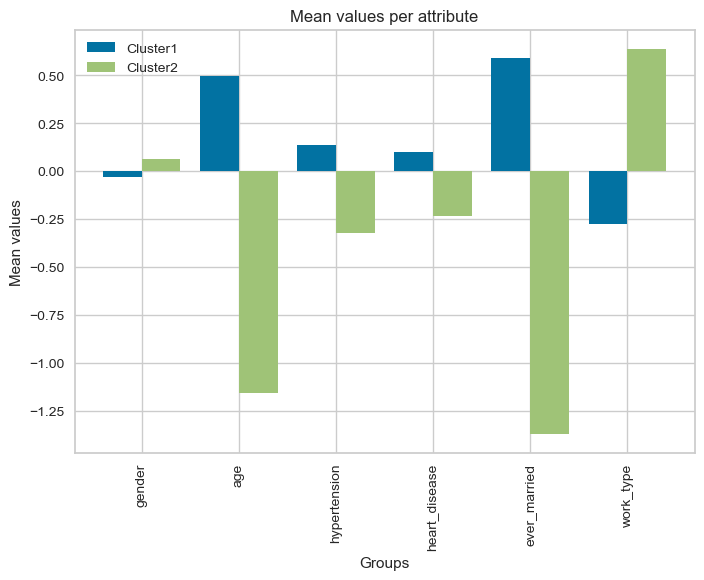

In [ ]:
X = cluster1.keys()[:6]


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1_mean_p1, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_mean_p1, 0.4, label = 'Cluster2')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
#plt.subplots_adjust(bottom=0.1)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

In [ ]:
cluster1_mean_p2 = cluster1_mean[6:]
cluster2_mean_p2 = cluster2_mean[6:]

In [ ]:
cluster1_mean_p2

array([0.00915018, 0.11587275, 0.2748571 , 0.20999589, 0.09354905])

In [ ]:
cluster2_mean_p2

array([-0.02125126, -0.2691141 , -0.63835472, -0.48771478, -0.21726736])

In [ ]:
cluster1.keys()[6:]

Index(['Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke', 'cluster'],
      dtype='object')

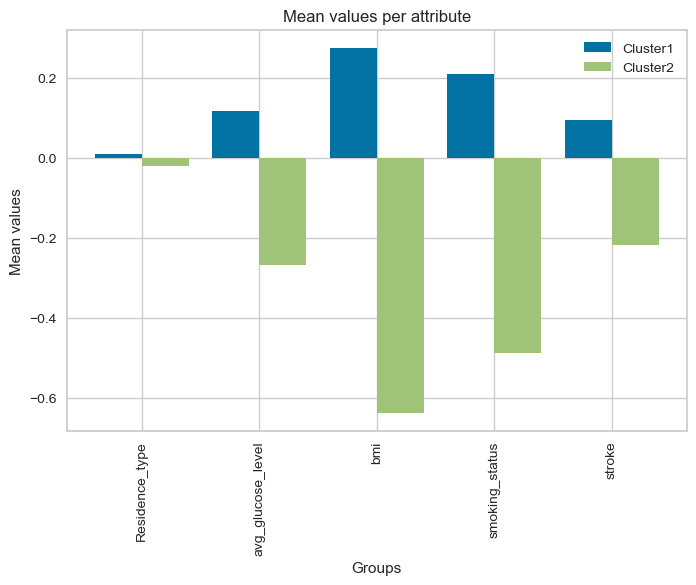

In [ ]:
X = cluster1.keys()[6:-1]


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1_mean_p2, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_mean_p2, 0.4, label = 'Cluster2')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

# Hierarchical Clustering

In [ ]:
#data from scaled_features_health
X = scaled_features_health

# Set n_clusters explicitly and use the correct parameter name
cluster = AgglomerativeClustering(n_clusters= 2, metric='euclidean', linkage='ward')
cluster.fit(X)

AgglomerativeClustering()

In [ ]:
#Assign the cluster labels
cluster.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# Fit the model to the data and predict the cluster labels
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
#Calculate the silhouette score
sil_score = silhouette_score(scaled_features_health, cluster.labels_)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.19


In [ ]:
#append dataframe with cluster number
X['cluster_no'] = cluster.labels_

In [ ]:
# Check the data
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster,cluster_no
0,1.188073,1.051434,-0.328602,4.185032,0.723884,-0.153836,0.984080,2.706375,1.005086,-0.351781,4.418381,0,0
1,-0.840344,0.786070,-0.328602,-0.238947,0.723884,0.763438,-1.016178,2.121559,-0.098981,0.581552,4.418381,0,0
2,1.188073,1.626390,-0.328602,4.185032,0.723884,-0.153836,-1.016178,-0.005028,0.472536,0.581552,4.418381,0,0
3,-0.840344,0.255342,-0.328602,-0.238947,0.723884,-0.153836,0.984080,1.437358,0.719327,1.514885,4.418381,0,0
4,-0.840344,1.582163,3.043196,-0.238947,0.723884,0.763438,-1.016178,1.501184,-0.631531,0.581552,4.418381,0,0


In [ ]:
X.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster,cluster_no
count,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03,5110.000000,5110.000000
mean,-7.508671e-17,5.005781e-17,-4.727682e-17,5.561978e-18,-6.118176e-17,-2.113552e-16,-9.177264e-17,1.001156e-16,-4.449583e-17,5.561978e-18,2.224791e-17,0.300978,0.306654
std,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,0.458728,0.461149
min,-8.403440e-01,-1.908261e+00,-3.286019e-01,-2.389468e-01,-1.381436e+00,-1.988384e+00,-1.016178e+00,-1.126958e+00,-2.411027e+00,-1.285114e+00,-2.263273e-01,0.000000,0.000000
25%,-8.403440e-01,-8.061152e-01,-3.286019e-01,-2.389468e-01,-1.381436e+00,-1.538364e-01,-1.016178e+00,-6.383223e-01,-6.575089e-01,-1.285114e+00,-2.263273e-01,0.000000,0.000000
50%,-8.403440e-01,7.843218e-02,-3.286019e-01,-2.389468e-01,7.238842e-01,-1.538364e-01,9.840797e-01,-3.149945e-01,-9.898092e-02,5.815523e-01,-2.263273e-01,0.000000,0.000000
75%,1.188073e+00,7.860701e-01,-3.286019e-01,-2.389468e-01,7.238842e-01,7.634376e-01,9.840797e-01,1.754080e-01,5.115031e-01,5.815523e-01,-2.263273e-01,1.000000,1.000000
max,3.216489e+00,1.714845e+00,3.043196e+00,4.185032e+00,7.238842e-01,1.680712e+00,9.840797e-01,3.657145e+00,8.928390e+00,1.514885e+00,4.418381e+00,1.000000,1.000000


In [ ]:
#save each cluster data separately
cluster1=X.query("cluster_no == 0")
cluster2=X.query("cluster_no == 1")

In [ ]:
cluster1.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster,cluster_no
count,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.000000,3543.0
mean,-0.030237,0.474797,0.145334,0.105682,0.610982,-0.249370,-0.006734,0.135177,0.259414,0.198525,0.100100,0.019193,0.0
std,0.993599,0.709949,1.172088,1.185857,0.474353,0.841160,1.000227,1.122339,0.938974,0.928750,1.187436,0.137221,0.0
min,-0.840344,-1.853419,-0.328602,-0.238947,-1.381436,-1.988384,-1.016178,-1.124749,-2.281137,-1.285114,-0.226327,0.000000,0.0
25%,-0.840344,-0.054250,-0.328602,-0.238947,0.723884,-0.153836,-1.016178,-0.618777,-0.339278,-0.351781,-0.226327,0.000000,0.0
50%,-0.840344,0.476478,-0.328602,-0.238947,0.723884,-0.153836,0.984080,-0.272480,0.069876,0.581552,-0.226327,0.000000,0.0
75%,1.188073,1.007207,-0.328602,-0.238947,0.723884,-0.153836,0.984080,0.371194,0.706338,0.581552,-0.226327,0.000000,0.0
max,1.188073,1.714845,3.043196,4.185032,0.723884,1.680712,0.984080,3.657145,8.928390,1.514885,4.418381,1.000000,0.0


In [ ]:
cluster1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster,cluster_no
0,1.188073,1.051434,-0.328602,4.185032,0.723884,-0.153836,0.984080,2.706375,1.005086,-0.351781,4.418381,0,0
1,-0.840344,0.786070,-0.328602,-0.238947,0.723884,0.763438,-1.016178,2.121559,-0.098981,0.581552,4.418381,0,0
2,1.188073,1.626390,-0.328602,4.185032,0.723884,-0.153836,-1.016178,-0.005028,0.472536,0.581552,4.418381,0,0
3,-0.840344,0.255342,-0.328602,-0.238947,0.723884,-0.153836,0.984080,1.437358,0.719327,1.514885,4.418381,0,0
4,-0.840344,1.582163,3.043196,-0.238947,0.723884,0.763438,-1.016178,1.501184,-0.631531,0.581552,4.418381,0,0


In [ ]:
cluster1.shape

(3543, 13)

In [ ]:
cluster2.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster,cluster_no
count,1567.000000,1567.000000,1.567000e+03,1.567000e+03,1.567000e+03,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1.567000e+03,1567.000000,1567.0
mean,0.068366,-1.073521,-3.286019e-01,-2.389468e-01,-1.381436e+00,0.563827,0.015225,-0.305636,-0.586538,-0.448866,-2.263273e-01,0.938098,1.0
std,1.011629,0.678131,6.441349e-15,5.719474e-15,2.887501e-14,1.097246,0.999959,0.528390,0.878872,1.010607,3.748199e-15,0.241054,0.0
min,-0.840344,-1.908261,-3.286019e-01,-2.389468e-01,-1.381436e+00,-1.988384,-1.016178,-1.126958,-2.411027,-1.285114,-2.263273e-01,0.000000,1.0
25%,-0.840344,-1.557980,-3.286019e-01,-2.389468e-01,-1.381436e+00,-0.153836,-1.016178,-0.683376,-1.255004,-1.285114,-2.263273e-01,1.000000,1.0
50%,-0.840344,-1.159934,-3.286019e-01,-2.389468e-01,-1.381436e+00,-0.153836,0.984080,-0.399471,-0.735443,-1.285114,-2.263273e-01,1.000000,1.0
75%,1.188073,-0.806115,-3.286019e-01,-2.389468e-01,-1.381436e+00,1.680712,0.984080,0.000603,-0.098981,0.581552,-2.263273e-01,1.000000,1.0
max,3.216489,1.714845,-3.286019e-01,-2.389468e-01,-1.381436e+00,1.680712,0.984080,2.510259,3.485989,1.514885,-2.263273e-01,1.000000,1.0


In [ ]:
cluster2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster,cluster_no
249,1.188073,-1.779117,-0.328602,-0.238947,-1.381436,1.680712,-1.016178,-0.243549,-1.410872,-1.285114,-0.226327,1,1
251,-0.840344,-1.557980,-0.328602,-0.238947,-1.381436,-0.153836,0.984080,0.104735,-1.462828,-1.285114,-0.226327,1,1
253,1.188073,-1.292616,-0.328602,-0.238947,-1.381436,-1.071110,-1.016178,1.217610,-1.267993,-1.285114,-0.226327,1,1
264,1.188073,-0.363842,-0.328602,-0.238947,-1.381436,-0.153836,-1.016178,-0.458880,0.537481,0.581552,-0.226327,1,1
265,-0.840344,-1.027252,-0.328602,-0.238947,-1.381436,-0.153836,0.984080,-0.475444,-1.190059,1.514885,-0.226327,1,1


In [ ]:
cluster2.shape

(1567, 13)

In [ ]:
# Calculate the cluster means
cluster1_mean = np.array(cluster1.mean())
cluster2_mean = np.array(cluster2.mean())

In [ ]:
cluster1_mean

array([-0.03023691,  0.47479728,  0.14533421,  0.10568152,  0.61098246,
       -0.24936955, -0.00673369,  0.13517701,  0.25941417,  0.19852488,
        0.10010015,  0.01919277,  0.        ])

In [ ]:
cluster2_mean

array([ 0.0683659 , -1.07352059, -0.32860186, -0.2389468 , -1.3814364 ,
        0.56382663,  0.01522494, -0.30563633, -0.58653759, -0.44886641,
       -0.22632726,  0.93809828,  1.        ])

In [ ]:
# Slice the clusters
cluster1_mean_p1 = cluster1_mean[:6]
cluster2_mean_p1 = cluster2_mean[:6]

In [ ]:
cluster1_mean_p1

array([-0.03023691,  0.47479728,  0.14533421,  0.10568152,  0.61098246,
       -0.24936955])

In [ ]:
cluster2_mean_p1

array([ 0.0683659 , -1.07352059, -0.32860186, -0.2389468 , -1.3814364 ,
        0.56382663])

In [ ]:
cluster1.keys()[:6]

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type'],
      dtype='object')

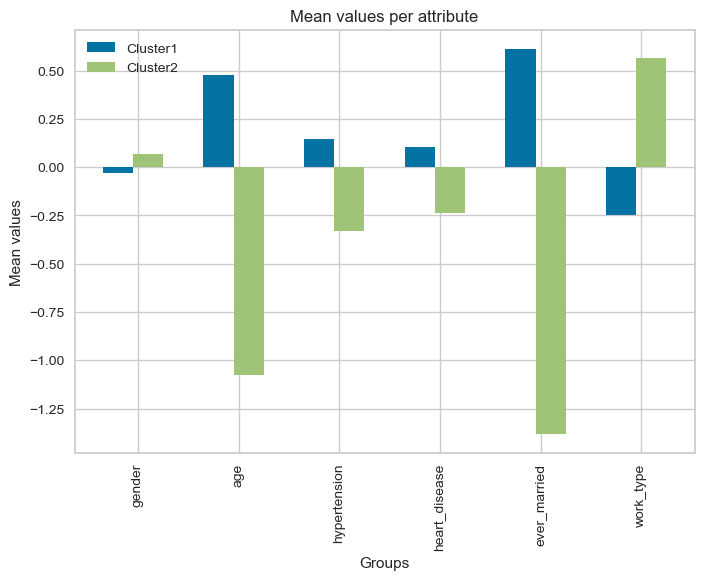

In [ ]:
# Visualize
X = cluster1.keys()[:6]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1_mean_p1, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2_mean_p1, 0.3, label = 'Cluster2')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
#plt.subplots_adjust(bottom=0.1)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()


In [ ]:
cluster1.keys()[6:-1]

Index(['Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke', 'cluster'],
      dtype='object')

In [ ]:
cluster1_mean_p2 = cluster1_mean[6:-1]
cluster2_mean_p2 = cluster2_mean[6:-1]

In [ ]:
cluster1_mean_p2

array([-0.00673369,  0.13517701,  0.25941417,  0.19852488,  0.10010015,
        0.01919277])

In [ ]:
cluster2_mean_p2

array([ 0.01522494, -0.30563633, -0.58653759, -0.44886641, -0.22632726,
        0.93809828])

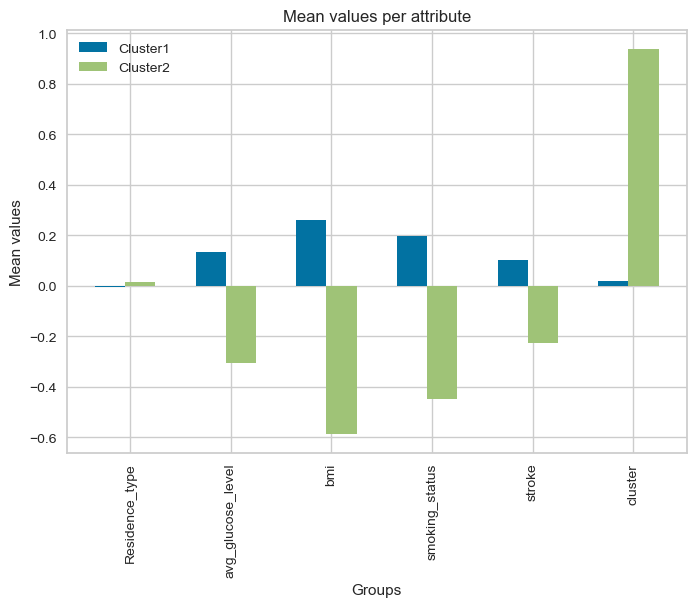

In [ ]:
X = cluster1.keys()[6:-1]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1_mean_p2, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2_mean_p2, 0.3, label = 'Cluster2')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

ii. BALANCED ITERATIVE REDUCING AND CLUSTERING USING HIERARCHIES

In [ ]:
scaled_features_health.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.188073,1.051434,-0.328602,4.185032,0.723884,-0.153836,0.984080,2.706375,1.005086,-0.351781,4.418381
1,-0.840344,0.786070,-0.328602,-0.238947,0.723884,0.763438,-1.016178,2.121559,-0.098981,0.581552,4.418381
2,1.188073,1.626390,-0.328602,4.185032,0.723884,-0.153836,-1.016178,-0.005028,0.472536,0.581552,4.418381
3,-0.840344,0.255342,-0.328602,-0.238947,0.723884,-0.153836,0.984080,1.437358,0.719327,1.514885,4.418381
4,-0.840344,1.582163,3.043196,-0.238947,0.723884,0.763438,-1.016178,1.501184,-0.631531,0.581552,4.418381


In [ ]:
# Select 1% of the data from scaled_features_census
X = scaled_features_health.sample(frac=0.5, replace=False, random_state=1)

# Initialize BIRCH model
birch_model = Birch(n_clusters=2)

# Fit the model on the sampled data
birch_model.fit(X)

Birch(n_clusters=2)

In [ ]:
# Get cluster labels
labels = birch_model.predict(X)
print("Cluster Labels:", labels)

Cluster Labels: [1 1 1 ... 1 1 0]


In [ ]:
# Fit the model to the data and predict the cluster labels
cluster_labels = birch_model.fit_predict(X)

In [ ]:
#append dataframe with cluster number
X['cluster_no'] = labels

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster_no
4673,-0.840344,-0.054250,-0.328602,-0.238947,0.723884,-1.988384,-1.016178,0.150893,1.083020,-0.351781,-0.226327,1
3232,-0.840344,1.537935,-0.328602,-0.238947,0.723884,-0.153836,0.984080,-0.615243,0.160800,-0.351781,-0.226327,1
3694,1.188073,-0.673433,-0.328602,-0.238947,-1.381436,-0.153836,0.984080,-0.726111,-0.449685,1.514885,-0.226327,1
1070,-0.840344,1.670617,-0.328602,-0.238947,0.723884,0.763438,-1.016178,3.096180,-1.008212,0.581552,-0.226327,1
4163,-0.840344,0.388024,-0.328602,-0.238947,0.723884,-0.153836,-1.016178,-0.200924,-0.111970,-1.285114,-0.226327,1


In [ ]:
X.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster_no
count,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000
mean,-0.008336,-0.017717,-0.006598,0.006926,-0.014420,-0.001257,-0.004697,0.008364,-0.025007,0.002192,0.002727,0.834834
std,0.999516,1.005509,0.991176,1.013748,1.004823,1.012255,1.000260,0.990856,0.980887,1.001978,1.005892,0.371403
min,-0.840344,-1.908261,-0.328602,-0.238947,-1.381436,-1.988384,-1.016178,-1.126958,-2.281137,-1.285114,-0.226327,0.000000
25%,-0.840344,-0.806115,-0.328602,-0.238947,-1.381436,-0.153836,-1.016178,-0.622863,-0.683487,-1.285114,-0.226327,1.000000
50%,-0.840344,0.034205,-0.328602,-0.238947,0.723884,-0.153836,0.984080,-0.295891,-0.098981,0.581552,-0.226327,1.000000
75%,1.188073,0.741843,-0.328602,-0.238947,0.723884,0.763438,0.984080,0.187997,0.472536,0.581552,-0.226327,1.000000
max,3.216489,1.714845,3.043196,4.185032,0.723884,1.680712,0.984080,3.476487,5.590211,1.514885,4.418381,1.000000


In [ ]:
#save each cluster data separately
cluster1=X.query("cluster_no == 0")
cluster2=X.query("cluster_no == 1")

In [ ]:
cluster1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster_no
4,-0.840344,1.582163,3.043196,-0.238947,0.723884,0.763438,-1.016178,1.501184,-0.631531,0.581552,4.418381,0
28,1.188073,1.139889,-0.328602,4.185032,0.723884,0.763438,0.984080,1.967404,-0.073003,1.514885,4.418381,0
643,-0.840344,1.626390,-0.328602,4.185032,0.723884,0.763438,0.984080,-0.597575,-0.787399,0.581552,-0.226327,0
2132,-0.840344,1.228344,-0.328602,4.185032,0.723884,-0.153836,0.984080,1.805077,0.043898,-0.351781,-0.226327,0
4822,-0.840344,0.874525,3.043196,-0.238947,0.723884,-0.153836,-1.016178,-1.082125,1.290844,0.581552,-0.226327,0


In [ ]:
cluster1.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster_no
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.0
mean,0.145024,0.955014,1.620969,1.249691,0.519339,-0.158184,0.026610,0.593877,0.258648,0.247587,1.160481,0.0
std,1.015001,0.596420,1.667129,2.092854,0.624274,0.862232,1.000405,1.331860,0.810738,0.873757,2.128101,0.0
min,-0.840344,-1.823345,-0.328602,-0.238947,-1.381436,-1.988384,-1.016178,-1.105094,-1.800543,-1.285114,-0.226327,0.0
25%,-0.840344,0.520706,-0.328602,-0.238947,0.723884,-0.153836,-1.016178,-0.502332,-0.202893,-0.351781,-0.226327,0.0
50%,-0.840344,1.073548,3.043196,-0.238947,0.723884,-0.153836,0.984080,-0.007899,0.024415,0.581552,-0.226327,0.0
75%,1.188073,1.493708,3.043196,4.185032,0.723884,0.763438,0.984080,2.007047,0.690102,0.581552,4.418381,0.0
max,1.188073,1.714845,3.043196,4.185032,0.723884,1.680712,0.984080,3.476487,3.602890,1.514885,4.418381,0.0


In [ ]:
cluster1.shape

(422, 12)

In [ ]:
cluster2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster_no
4673,-0.840344,-0.054250,-0.328602,-0.238947,0.723884,-1.988384,-1.016178,0.150893,1.083020,-0.351781,-0.226327,1
3232,-0.840344,1.537935,-0.328602,-0.238947,0.723884,-0.153836,0.984080,-0.615243,0.160800,-0.351781,-0.226327,1
3694,1.188073,-0.673433,-0.328602,-0.238947,-1.381436,-0.153836,0.984080,-0.726111,-0.449685,1.514885,-0.226327,1
1070,-0.840344,1.670617,-0.328602,-0.238947,0.723884,0.763438,-1.016178,3.096180,-1.008212,0.581552,-0.226327,1
4163,-0.840344,0.388024,-0.328602,-0.238947,0.723884,-0.153836,-1.016178,-0.200924,-0.111970,-1.285114,-0.226327,1


In [ ]:
cluster2.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster_no
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2.133000e+03,2133.0
mean,-0.038677,-0.210166,-0.328602,-0.238947,-0.120021,0.029790,-0.010891,-0.107476,-0.081126,-0.046358,-2.263273e-01,1.0
std,0.993864,0.957386,0.000000,0.000000,1.031995,1.036742,1.000350,0.862883,1.001854,1.018649,2.776208e-17,0.0
min,-0.840344,-1.908261,-0.328602,-0.238947,-1.381436,-1.988384,-1.016178,-1.126958,-2.281137,-1.285114,-2.263273e-01,1.0
25%,-0.840344,-0.983025,-0.328602,-0.238947,-1.381436,-0.153836,-1.016178,-0.641966,-0.761421,-1.285114,-2.263273e-01,1.0
50%,-0.840344,-0.186932,-0.328602,-0.238947,0.723884,-0.153836,0.984080,-0.340945,-0.176915,0.581552,-2.263273e-01,1.0
75%,1.188073,0.520706,-0.328602,-0.238947,0.723884,0.763438,0.984080,0.106944,0.433569,0.581552,-2.263273e-01,1.0
max,3.216489,1.714845,-0.328602,-0.238947,0.723884,1.680712,0.984080,3.262261,5.590211,1.514885,-2.263273e-01,1.0


In [ ]:
cluster2.shape

(2133, 12)

In [ ]:
# Calculate the cluster means
cluster1_mean = np.array(cluster1.mean())
cluster2_mean = np.array(cluster2.mean())

In [ ]:
cluster1_mean

array([ 0.14502423,  0.95501443,  1.62096868,  1.24969061,  0.51933884,
       -0.15818363,  0.02661049,  0.59387709,  0.2586481 ,  0.24758719,
        1.16048129,  0.        ])

In [ ]:
cluster2_mean

array([-0.03867726, -0.21016582, -0.32860186, -0.2389468 , -0.12002068,
        0.02979045, -0.01089131, -0.10747571, -0.08112635, -0.04635808,
       -0.22632726,  1.        ])

In [ ]:
# Slice the clusters
cluster1_mean_p1 = cluster1_mean[:6]
cluster2_mean_p1 = cluster2_mean[:6]

In [ ]:
cluster1.keys()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'cluster_no'],
      dtype='object')

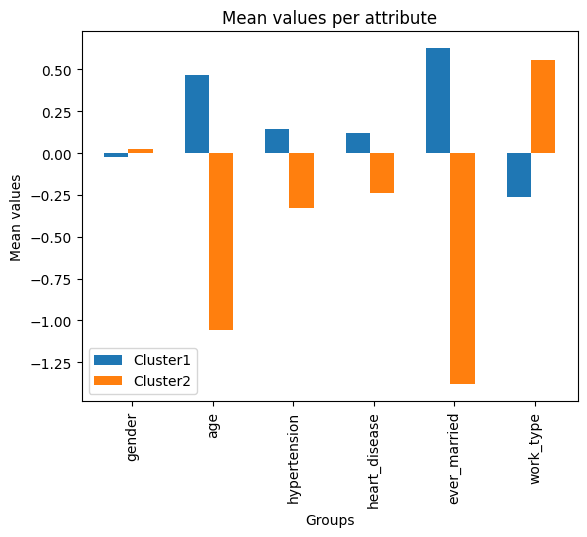

In [ ]:
# Visualize
X = cluster1.keys()[:6]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1_mean_p1, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2_mean_p1, 0.3, label = 'Cluster2')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
#plt.subplots_adjust(bottom=0.1)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

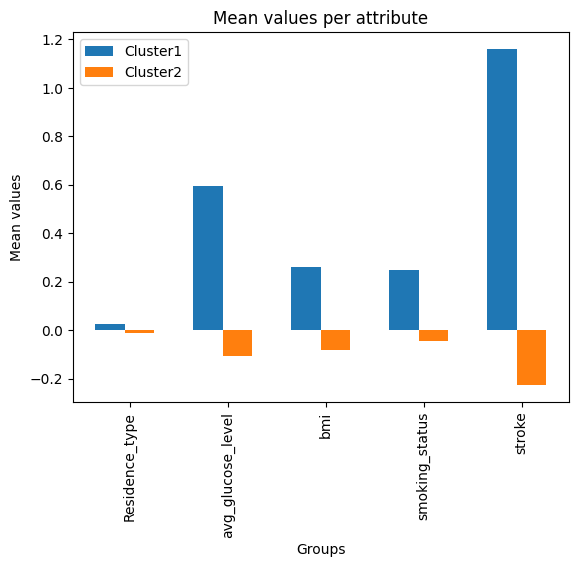

In [ ]:
cluster1_mean_p2 = cluster1_mean[6:-1]
cluster2_mean_p2 = cluster2_mean[6:-1]

X = cluster1.keys()[6:-1]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1_mean_p2, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2_mean_p2, 0.3, label = 'Cluster2')


plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()